# **Connecting to the google drive**

In [30]:
# File is stored in the drive so we link the drive to access the file 
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Final_Project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Final_Project


# **Importing the libraries**

In [31]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Final_Project"
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


# **Downloading the dataset from Kaggle**

In [32]:
#!kaggle datasets download -d hojjatk/mnist-dataset

# **Unzipping the file and placing it in the correct directory**

In [33]:
# !unzip /content/drive/MyDrive/Final_Project/mnist-dataset.zip -d /content/drive/MyDrive/Final_Project/mnist-dataset/

# **Defining the "show_images" function**


In [ ]:
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

# **Loading the Dataset and dividint it into test and train sets**

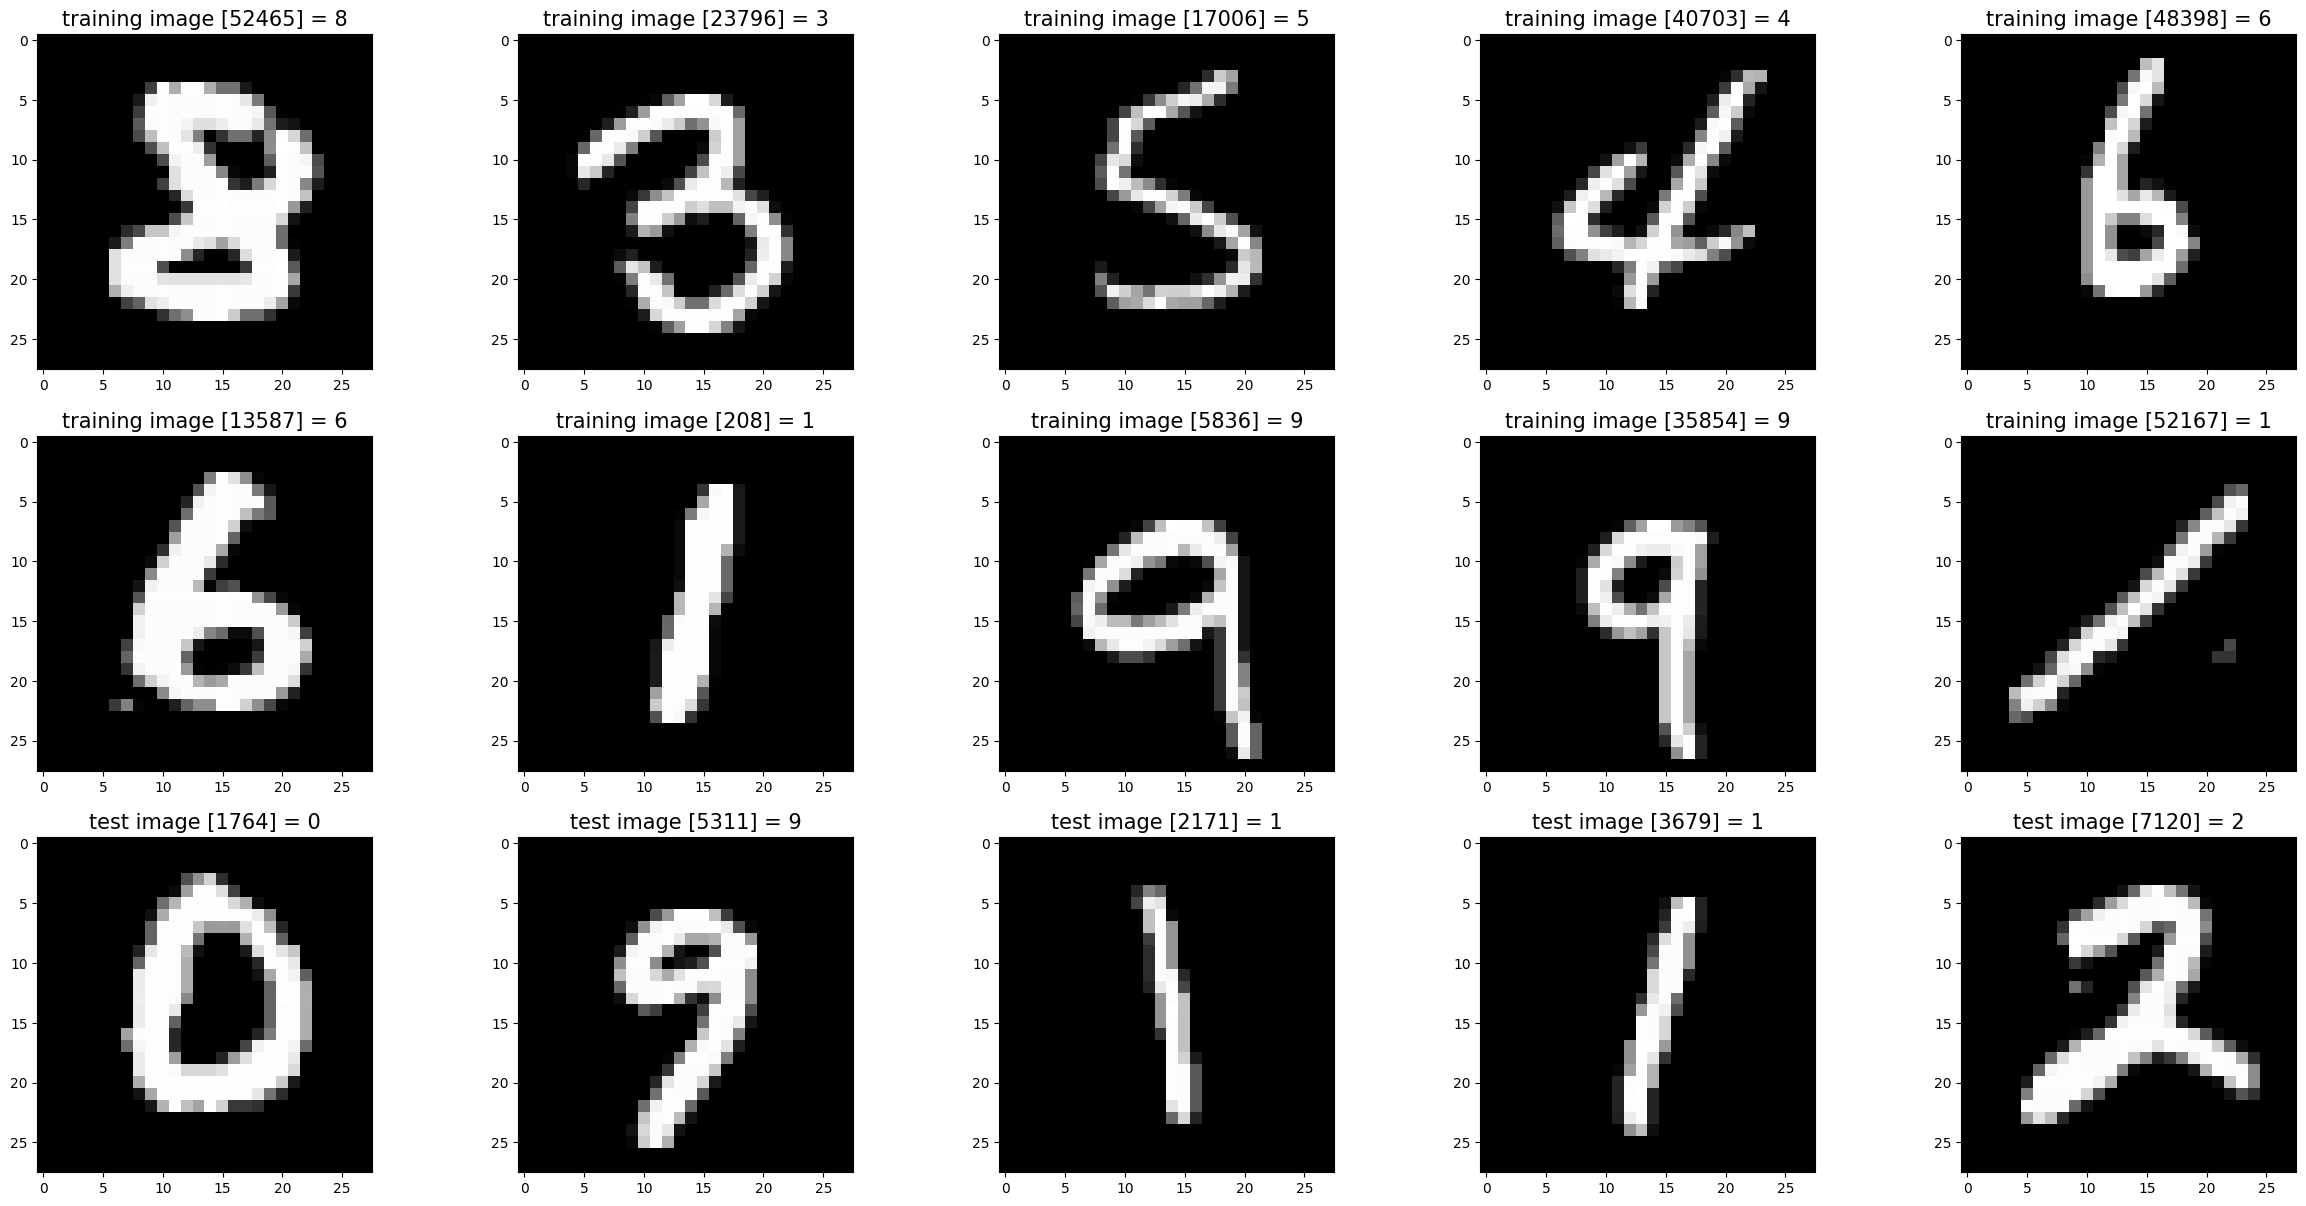

In [35]:
#
# Load MNIST dataset
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


# **Data Preprocessing**

In [36]:
# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0


# **Defining the CNN architecture**

In [37]:
# Define the model architecture
cnn = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# **Compiling the model**

In [38]:
# Compile the model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# **Training the model**

In [39]:
# Train the model
cnn.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2685 - accuracy: 0.9231 - val_loss: 0.1375 - val_accuracy: 0.9582
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1182 - accuracy: 0.9651 - val_loss: 0.1084 - val_accuracy: 0.9673
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0813 - accuracy: 0.9755 - val_loss: 0.0804 - val_accuracy: 0.9748
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0598 - accuracy: 0.9812 - val_loss: 0.0722 - val_accuracy: 0.9767
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0719 - val_accuracy: 0.9784
Epoch 7/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0734 - val_ac

# **Using the model to make a prediction**

313/313 [==============================] - 1s 2ms/step
 Prediction for test image 0: 7
 Prediction for test image 1: 2
 Prediction for test image 2: 1
 Prediction for test image 3: 0
 Prediction for test image 4: 4
Prediction made by the model:  [7 2 1 ... 4 5 6]
The test images are: 


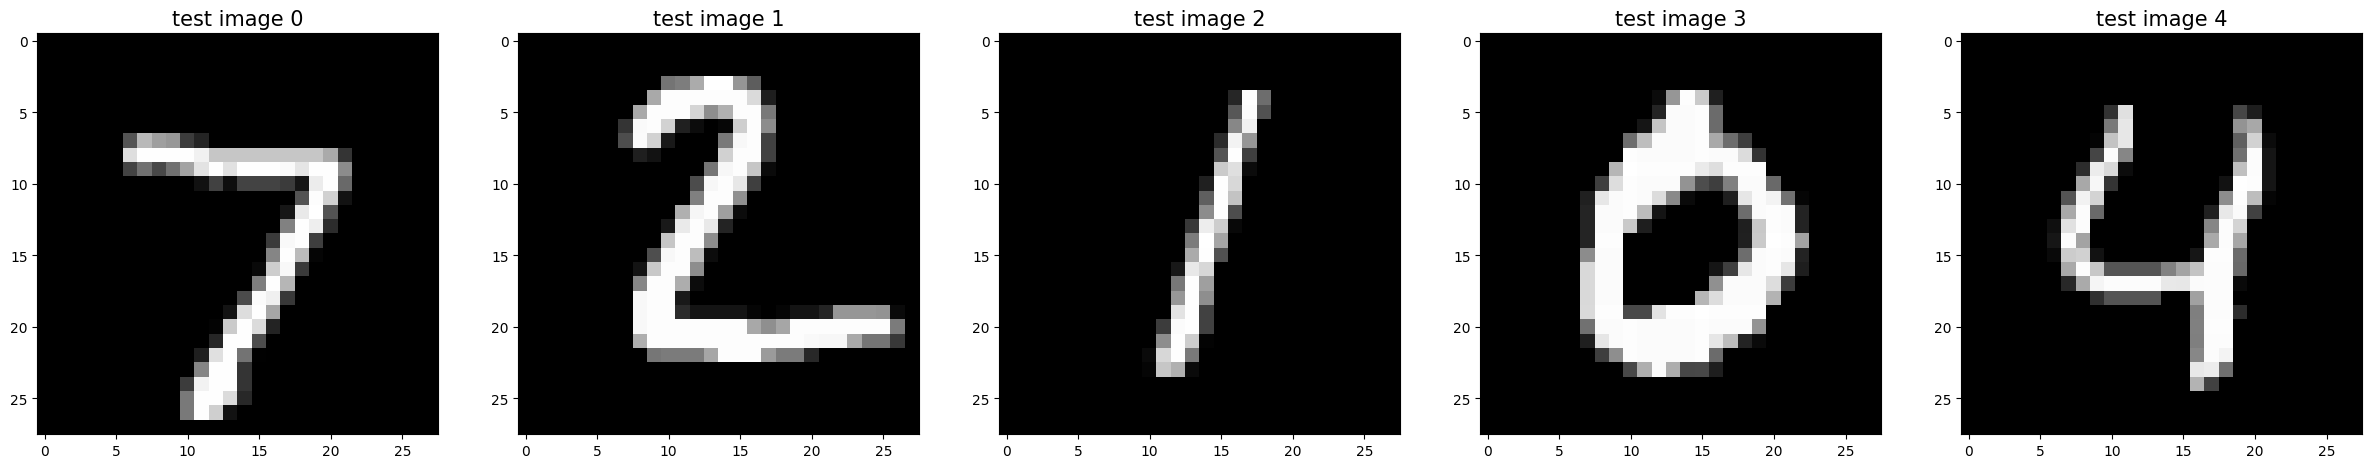

In [40]:
y_pred = np.argmax(cnn.predict(x_test), axis=-1)
test_images=[]
test_titles=[]

for i in range(0, 5):
  test_images.append(x_test[i])
  test_titles.append('test image '+ str(i) )
  print(" Prediction for test image "+ str(i) +":",y_pred[i])  

show_images(test_images, test_titles)
print("=========================================================================")
print("Prediction made by the model: ",y_pred)
print("=========================================================================")
print("The test images are: ")

# **Calculating the accuracy and confusion matrix**

313/313 [==============================] - 1s 2ms/step - loss: 0.1079 - accuracy: 0.9796
Test accuracy: 0.9796000123023987
------------------------------------------------------------------------
[[ 967    0    0    0    1    1    5    1    3    2]
 [   0 1123    3    1    0    0    2    2    4    0]
 [   4    2 1007    0    1    0    3    4   10    1]
 [   0    0    5  989    0    5    0    4    5    2]
 [   0    1    2    2  958    1    5    1    2   10]
 [   2    0    0    7    1  871    3    0    6    2]
 [   1    2    1    1    3    6  942    0    2    0]
 [   2    2    8    1    2    0    1 1002    4    6]
 [   3    1    0    2    3    4    1    4  952    4]
 [   0    2    0    2    4    4    2    2    8  985]]
------------------------------------------------------------------------


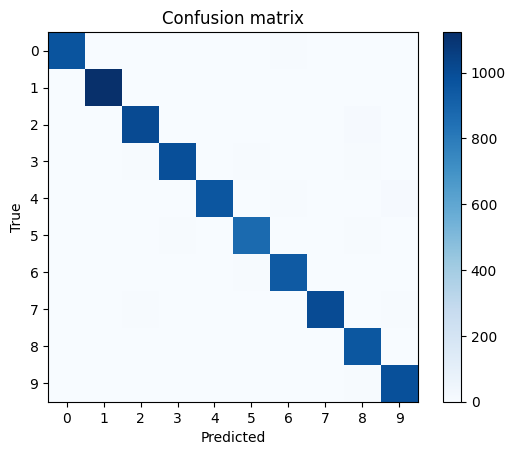

In [41]:
# Evaluate the model
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print("------------------------------------------------------------------------")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("------------------------------------------------------------------------")
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()